<a href="https://colab.research.google.com/github/GustasAndre/Extens-o-Acad-mica-/blob/main/Extens%C3%A3o_academica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSULTORIA REFERENTE A MARJENTHI QUIMICA LTDA
*                    Atividade de extensão realizada como critério avaliativo para o terceiro semestre de 2024 na matéria Atividade de Extensão  orientado pelo Professor Thálisson de Oliveira Lopes. *


Este trabalho de extensão, realizado durante a disciplina de Atividade de Extensão dos cursos de Análise e Desenvolvimento de Sistemas (ADS) e Sistemas de Informação (SI), teve como foco a análise das notas fiscais em XML da empresa Marjenthi Química LTDA. Identificou-se a necessidade urgente de aprimorar o gerenciamento e a organização dos faturamentos da empresa. Após uma análise detalhada dos requisitos, foram desenvolvidas recomendações de soluções para resolver eficazmente os desafios identificados.

# Recebimento e tratamento dos arquivos

Após entrar em contato com a empresa MARJENTHI QUÍMICA LTDA, recebemos um conjunto de 4891 notas fiscais em formato XML. Lidar com esses arquivos representou um desafio, pois era necessário convertê-los em um DataFrame para uma análise de dados mais eficiente. Durante a análise dos arquivos XML, identificamos dados cruciais a serem extraídos, como Data de Emissão, Código, Descrição, Quantidade, Unidade, Valor Unitário ,Valor Total e tributos. Com base nessas informações, criamos um único arquivo em formato CSV para facilitar a análise de dados. Segue abaixo o código desenvolvido no Visual Studio Code utilizando a linguagem de programação Python e suas bibliotecas correspondentes

```
# Isto está formatado como código

# Importar a bibliotecas:
import xml.etree.ElementTree as ET
import pandas as pd
import os

# Função para extrair os dados dos itens da nota fiscal
def extrair_dados_nota(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    itens = []

    # Navegar para o elemento que contém os itens da nota fiscal
    for det in root.findall('.//{http://www.portalfiscal.inf.br/nfe}det'):
        # Extrair dados de cada item
        codigo_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}cProd')
        descricao_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}xProd')
        quantidade_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}qCom')
        unidade_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}uCom')
        valor_unitario_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}vUnCom')
        valor_total_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}vProd')
        tributos_element = det.find('.//{http://www.portalfiscal.inf.br/nfe}vTotTrib') # Adicionado tributos cobrados

        # Verificar se os elementos foram encontrados
        if codigo_element is not None and \
           descricao_element is not None and \
           quantidade_element is not None and \
           unidade_element is not None and \
           valor_unitario_element is not None and \
           valor_total_element is not None and \
           tributos_element is not None: # Verificar se o elemento de tributos foi encontrado
            # Extrair texto dos elementos
            codigo = codigo_element.text
            descricao = descricao_element.text
            quantidade = float(quantidade_element.text)
            unidade = unidade_element.text
            valor_unitario = float(valor_unitario_element.text)
            valor_total = float(valor_total_element.text)
            tributos = float(tributos_element.text) # Extrair tributos

            # Extrair número e data da nota fiscal
            num_nfe = root.find('.//{http://www.portalfiscal.inf.br/nfe}nNF').text
            data_emissao = root.find('.//{http://www.portalfiscal.inf.br/nfe}dhEmi').text.split('T')[0]

            # Criar um dicionário com os dados do item e adicioná-lo à lista de itens
            itens.append({
                'NumeroNota': num_nfe,
                'DataEmissao': data_emissao,
                'Codigo': codigo,
                'Descricao': descricao,
                'Quantidade': quantidade,
                'Unidade': unidade,
                'ValorUnitario': valor_unitario,
                'ValorTotal': valor_total,
                'Tributos': tributos # Adicionado tributos ao dicionário
            })

    return itens

# Pasta contendo os arquivos XML
pasta_xml = 'TODAS XML'

# Lista para armazenar os dados de todos os arquivos XML
dados_totais = []

# Iterar sobre os arquivos na pasta
for arquivo in os.listdir(pasta_xml):
    if arquivo.endswith('.xml'):
        # Extrair dados da nota fiscal
        dados_nota = extrair_dados_nota(os.path.join(pasta_xml, arquivo))
        # Adicionar os dados ao total
        dados_totais.extend(dados_nota)

# Criar DataFrame com os dados totais
df = pd.DataFrame(dados_totais)

# Visualizar as primeiras linhas do DataFrame
print(df.head())
df.info()

# Caminho para o arquivo CSV de saída
caminho_arquivo_csv = 'dados_totais.csv'

# Salvar os dados totais em um arquivo CSV
df.to_csv(caminho_arquivo_csv, index=False)

print(f'Dados salvos em: {caminho_arquivo_csv}')

```

# Limpeza e filtragem de dados:
Após toda a análise de dos arquivos XMLs e criação do dataframe em csv, agora é uma parte crucial para uma boa análise de dados a limpeza e a filtragem de dados:


In [60]:
#importar bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
#Criação de um DataFrame (DF)
df = pd.read_csv('/content/dados_totais.csv')
#Verificando tipos de dados e se há dados nulos no dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NumeroNota     14242 non-null  int64  
 1   DataEmissao    14242 non-null  object 
 2   Codigo         14242 non-null  object 
 3   Descricao      14242 non-null  object 
 4   Quantidade     14242 non-null  float64
 5   Unidade        14242 non-null  object 
 6   ValorUnitario  14242 non-null  float64
 7   ValorTotal     14242 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 890.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Utilizamos a função info da biblioteca pandas para termos uma melhor abordagem sobre os dados e ao observar, vocês podem notar que há tipos de dados em formatos errados como por exemplo: data de emissão vamos corrigir isso logo abaixo


In [38]:
# Corrigir o tipo de dados da coluna DataEmissao para datetime
df['DataEmissao'] = pd.to_datetime(df['DataEmissao'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   NumeroNota     14242 non-null  int64         
 1   DataEmissao    14242 non-null  datetime64[ns]
 2   Codigo         14242 non-null  object        
 3   Descricao      14242 non-null  object        
 4   Quantidade     14242 non-null  float64       
 5   Unidade        14242 non-null  object        
 6   ValorUnitario  14242 non-null  float64       
 7   ValorTotal     14242 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 890.2+ KB


Uma outra informção muito importante é a contagem de linhas do dataframe, pois através dela vemos se há informações faltantes, o que não é o nosso caso neste momento.


In [40]:
#Verificando dados duplicados
duplicados = df[df.duplicated()]
print(duplicados)

       NumeroNota DataEmissao           Codigo  \
712         11809  2023-03-03            19141   
758         11825  2023-03-04    2000000000333   
3033        12813  2023-05-19    2000000000306   
3952        13353  2023-07-04    2000000001210   
5331        13916  2023-09-12    2000000000195   
...           ...         ...              ...   
10333       15940  2024-03-16    2000000000341   
10341       15942  2024-03-16  200000000002502   
10743       16089  2024-04-02    2000000000241   
10744       16089  2024-04-02    2000000000241   
10797       16108  2024-04-03    2000000000241   

                                         Descricao  Quantidade Unidade  \
712                         MULTIUSO AZULIM 500 ML         1.0      UN   
758                  KIT DESINFETANTE LAVANDA MUSK         1.0      UN   
3033                   KIT SABAO LIQUIDO 50 LITROS         1.0      UN   
3952                         ESSENCIA PIMENTA ROSA         1.0      UN   
5331                  GLICERI

Após a aplicação da função duplicate, foi visto que há 68 dados duplicados no nosso dataframe e com base nisso iremos corrigir para que não haja nenhum tipo de interferencias em nossos dados.

In [41]:
#Dropando os dados duplicados do DataFrame
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14174 entries, 0 to 14241
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   NumeroNota     14174 non-null  int64         
 1   DataEmissao    14174 non-null  datetime64[ns]
 2   Codigo         14174 non-null  object        
 3   Descricao      14174 non-null  object        
 4   Quantidade     14174 non-null  float64       
 5   Unidade        14174 non-null  object        
 6   ValorUnitario  14174 non-null  float64       
 7   ValorTotal     14174 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 996.6+ KB


Já fizemos todos o processo de limpeza e extração dos dados, agora iremos para a análise de dados.


# Análise de dados
Após uma boa limpeza e extração de dados podemos dar início a toda análise de dados.

1- Análise Descritiva:
  Calcule estatísticas descritivas para as colunas numéricas, como média, mediana, mínimo, máximo e desvio padrão.
  Explore a distribuição das quantidades, valores unitários, valores totais e tributos.
2- Análise de Tempo:
  Analise padrões de emissão ao longo do tempo, como tendências mensais, sazonais ou anuais.
  Identifique meses com maiores volumes de emissão de notas.
3- Análise de Produtos/Serviços:
  Identifique os produtos ou serviços mais vendidos (maiores quantidades vendidas ou maiores valores totais).
  Analise a distribuição de produtos/serviços por categoria ou código.
4- Análise de Unidades:
  Analise a distribuição das unidades em que os produtos são vendidos.
  Verifique se há alguma relação entre as unidades e os valores totais ou tributos.
5- Análise de Outliers:
  Identifique e investigue outliers nas colunas numéricas, como valores totais muito altos ou baixos.
6- Análise de Correlação:
Verifique se existe correlação entre as diferentes variáveis, como valor unitário e quantidade, valor total e tributos, etc.

In [42]:
# Calculando estatísticas descritivas
df.describe()

,NumeroNota,DataEmissao,Quantidade,ValorUnitario,ValorTotal
count,14174.000000,14174,14174.000000,14174.000000,14174.000000
mean,12566.869903,2023-07-29 15:06:25.551008768,2.554819,40.876115,73.359876
min,511.000000,2022-11-01 00:00:00,1.000000,0.150000,0.300000
25%,11701.250000,2023-03-15 00:00:00,1.000000,15.000000,16.300000
50%,13361.500000,2023-08-03 00:00:00,1.000000,24.000000,32.600000
75%,14747.000000,2023-12-08 00:00:00,2.000000,37.000000,60.000000
max,16221.000000,2024-04-10 00:00:00,500.000000,1100.000000,7080.000000
std,3598.196788,NaN,8.734200,78.139629,227.081422


Apos toda a análise descritiva vamos agora extrair mais informacoes do dataframe.

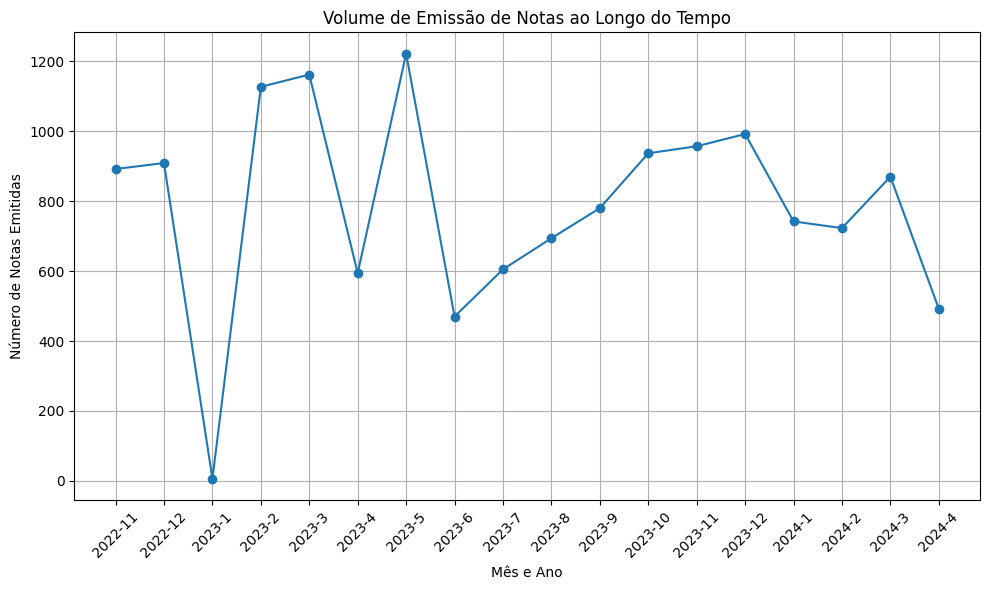

In [43]:
#Análise de Tempo: Analise padrões de emissão ao longo do tempo, como tendências mensais, sazonais ou anuais.
#Identifique meses com maiores volumes de emissão de notas.

# Extrair mês e ano da data de emissão
df['Ano'] = df['DataEmissao'].dt.year
df['Mês'] = df['DataEmissao'].dt.month

# Agrupar por mês e calcular o número de notas emitidas em cada mês
emissao_mensal = df.groupby(['Ano', 'Mês']).size().reset_index(name='Total')

# Plotar o volume de emissão ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(emissao_mensal['Ano'].astype(str) + '-' + emissao_mensal['Mês'].astype(str), emissao_mensal['Total'], marker='o')
plt.title('Volume de Emissão de Notas ao Longo do Tempo')
plt.xlabel('Mês e Ano')
plt.ylabel('Número de Notas Emitidas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

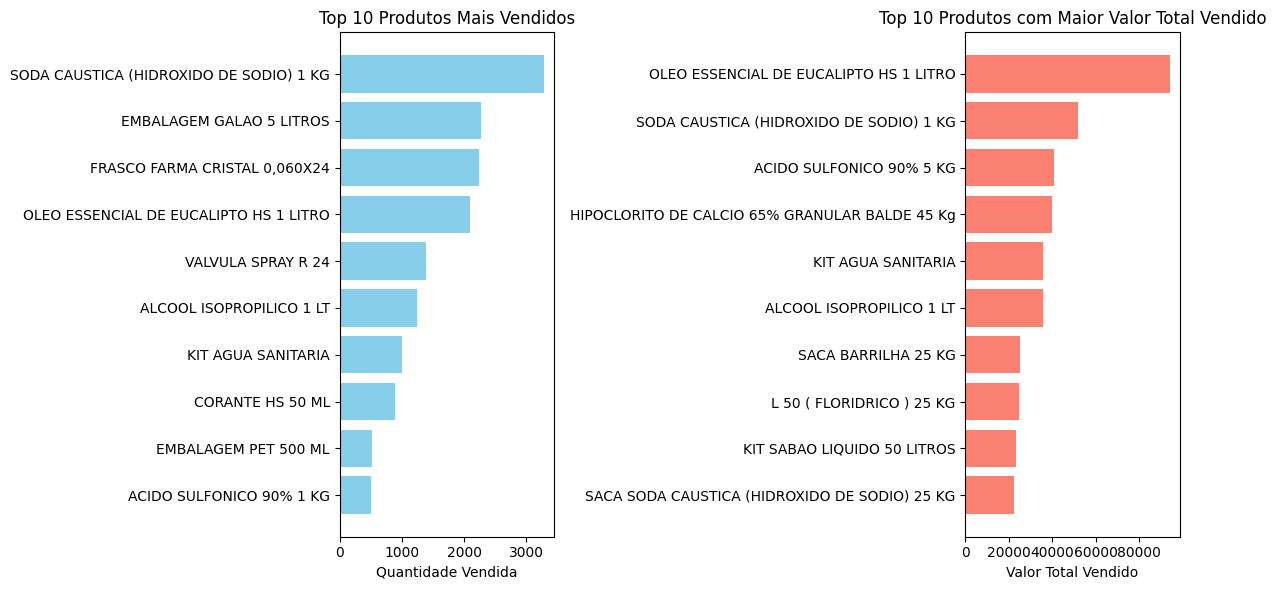

In [44]:
# Agrupe os dados por descrição do produto e calcule a quantidade total vendida e o valor total vendido para cada produto
produtos_vendidos = df.groupby('Descricao').agg({'Quantidade': 'sum', 'ValorTotal': 'sum'}).reset_index()

# Identifique os produtos mais vendidos com base na quantidade vendida
produtos_mais_vendidos = produtos_vendidos.sort_values(by='Quantidade', ascending=False).head(10)

# Identifique os produtos mais vendidos com base no valor total vendido
produtos_maiores_valores = produtos_vendidos.sort_values(by='ValorTotal', ascending=False).head(10)

# Exemplo de visualização dos resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(produtos_mais_vendidos['Descricao'], produtos_mais_vendidos['Quantidade'], color='skyblue')
plt.xlabel('Quantidade Vendida')
plt.title('Top 10 Produtos Mais Vendidos')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(produtos_maiores_valores['Descricao'], produtos_maiores_valores['ValorTotal'], color='salmon')
plt.xlabel('Valor Total Vendido')
plt.title('Top 10 Produtos com Maior Valor Total Vendido')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


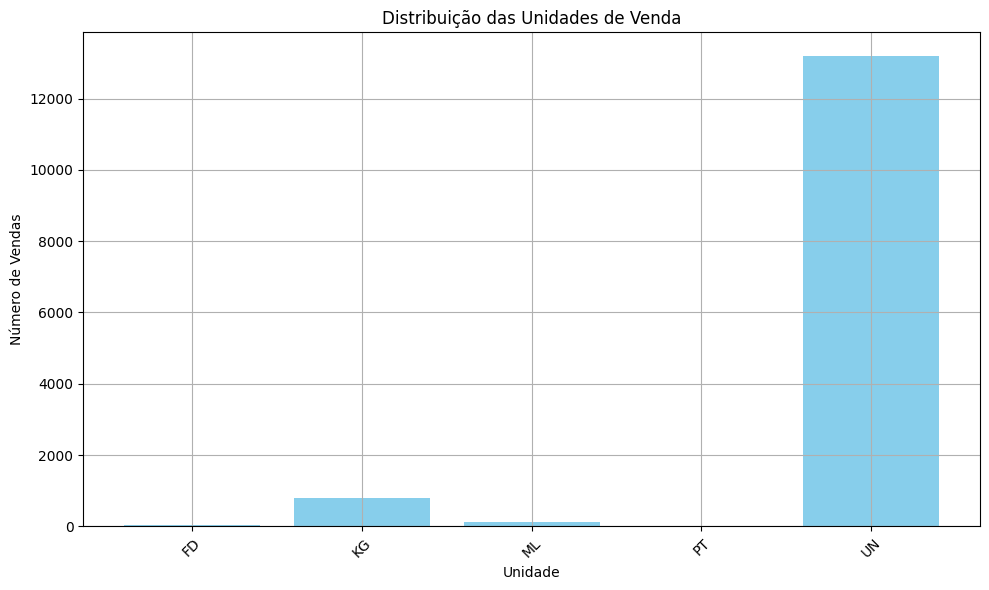

In [45]:
#Análise de Unidades: Analise a distribuição das unidades em que os produtos são vendidos.
# Agrupe os dados por unidade e calcule o número total de vendas para cada unidade
unidades_vendidas = df.groupby('Unidade').size().reset_index(name='Total')

# Visualize os resultados
plt.figure(figsize=(10, 6))
plt.bar(unidades_vendidas['Unidade'], unidades_vendidas['Total'], color='skyblue')
plt.xlabel('Unidade')
plt.ylabel('Número de Vendas')
plt.title('Distribuição das Unidades de Venda')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

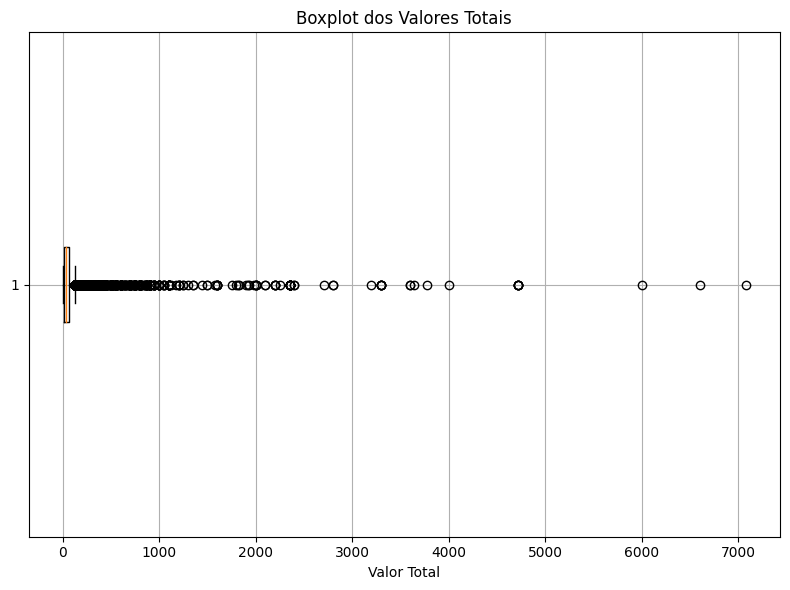

Outliers:
       NumeroNota DataEmissao         Codigo  \
7           11574  2023-02-11  2000000000240   
20          11576  2023-02-11  2000000000240   
21          11576  2023-02-11  2000000000306   
22          11576  2023-02-11  2000000000267   
94          11600  2023-02-14             12   
...           ...         ...            ...   
14230         554  2023-01-12  0000000000416   
14231         554  2023-01-12  2000000000013   
14232         554  2023-01-12  0000000000380   
14233         555  2023-01-12  2000000000110   
14234         573  2023-02-03  2000000001196   

                                           Descricao  Quantidade Unidade  \
7          CLORO LIQUIDO HIPORCLORITO DE SODIO 60 KG         1.0      UN   
20         CLORO LIQUIDO HIPORCLORITO DE SODIO 60 KG         1.0      UN   
21                       KIT SABAO LIQUIDO 50 LITROS         2.0      UN   
22     SACA SODA CAUSTICA (HIDROXIDO DE SODIO) 25 KG         1.0      FD   
94                          ACIDO

In [46]:
# Análise de Outliers:
#Identifique e investigue outliers nas colunas numéricas, como valores totais muito altos ou baixos.

descricao_valor_total = df['ValorTotal'].describe()

# Visualize a distribuição dos dados usando um boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['ValorTotal'], vert=False)
plt.xlabel('Valor Total')
plt.title('Boxplot dos Valores Totais')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identifique outliers usando o método IQR
Q1 = df['ValorTotal'].quantile(0.25)
Q3 = df['ValorTotal'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['ValorTotal'] < limite_inferior) | (df['ValorTotal'] > limite_superior)]
print("Outliers:")
print(outliers)

O resultado mostra os registros que foram identificados como outliers com base no método do Intervalo Interquartil (IQR). Vamos explicar o que cada coluna representa:

NumeroNota: O número da nota fiscal associada ao registro.
DataEmissao: A data de emissão da nota fiscal.
Codigo: O código associado ao produto ou serviço.
Descricao: A descrição do produto ou serviço.
Quantidade: A quantidade vendida do produto ou serviço.
Unidade: A unidade de medida do produto ou serviço.
ValorUnitario: O valor unitário do produto ou serviço.
ValorTotal: O valor total da venda para o produto ou serviço.
Ano: O ano da data de emissão da nota fiscal.
Mês: O mês da data de emissão da nota fiscal.
Os registros listados são os que foram considerados outliers, ou seja, eles têm valores de 'ValorTotal' que estão além de 1,5 vezes o intervalo interquartil (IQR) acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1).

In [47]:
# Calcule a matriz de correlação
correlacao = df[['Quantidade', 'ValorUnitario', 'ValorTotal']].corr()

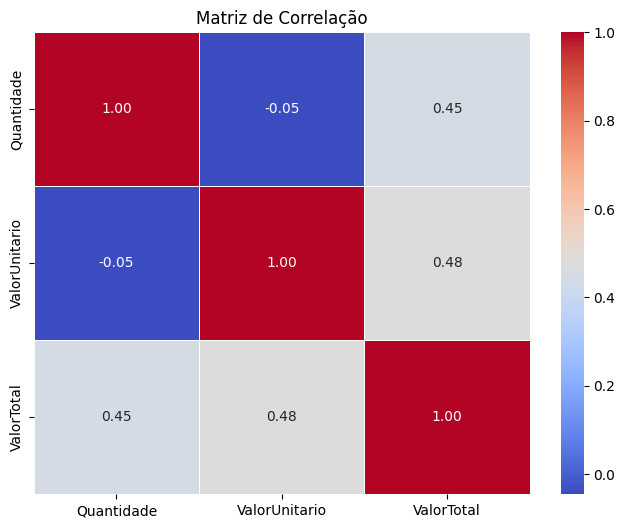

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Os valores do coeficiente de correlação variam de -1 a 1.
Um valor próximo de 1 indica uma correlação positiva forte, ou seja, quando uma variável aumenta, a outra também tende a aumentar.
Um valor próximo de -1 indica uma correlação negativa forte, ou seja, quando uma variável aumenta, a outra tende a diminuir.
Um valor próximo de 0 indica falta de correlação ou correlação fraca entre as variáveis.

# Criando um modelo de Machine learn:

Vamos buscar os seguintes dados futuros:

*   Análise de Associação:
 A análise de associação é comumente usada em dados transacionais, como registros de compras, para descobrir padrões de co-ocorrência entre os itens. Isso pode nos ajudar a identificar quais produtos são frequentemente comprados juntos, permitindo a criação de estratégias de venda cruzada mais eficazes.

*   Previsão de Demanda:
A previsão de demanda é crucial para otimizar os níveis de estoque e produção, garantindo que haja produtos suficientes disponíveis para atender à demanda do cliente sem excesso de estoque.


*   Previsão de Vendas:
A previsão de vendas é essencial para planejar estratégias de negócios e alocação de recursos, permitindo que as empresas antecipem a demanda futura e tomem decisões informadas.





In [50]:
# Análise de Associação:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Supondo que seu DataFrame seja chamado df e tenha uma coluna 'NumeroNota' que representa o número da transação
# e uma coluna 'Descricao' que representa o item comprado em cada transação

# Pré-processamento dos dados: criando um DataFrame de transações
transacoes = df.groupby(['NumeroNota', 'Descricao'])['Descricao'].count().unstack().fillna(0)

# Convertendo contagens em valores binários
transacoes_binarias = transacoes.applymap(lambda x: 1 if x > 0 else 0)

# Aplicação do algoritmo Apriori para identificar os conjuntos frequentes de itens
conjuntos_frequentes = apriori(transacoes_binarias, min_support=0.03, use_colnames=True)

# Geração de regras de associação
regras_associacao = association_rules(conjuntos_frequentes, metric='lift', min_threshold=1)

# Visualização das regras de associação
print(regras_associacao)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                 antecedents  \
0                            (KIT AMACIANTE)   
1                       (KIT AGUA SANITARIA)   
2  (SODA CAUSTICA (HIDROXIDO DE SODIO) 1 KG)   
3                       (KIT AGUA SANITARIA)   

                                 consequents  antecedent support  \
0                       (KIT AGUA SANITARIA)            0.061951   
1                            (KIT AMACIANTE)            0.158659   
2                       (KIT AGUA SANITARIA)            0.196892   
3  (SODA CAUSTICA (HIDROXIDO DE SODIO) 1 KG)            0.158659   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.158659  0.030055    0.485149  3.057811  0.020226    1.634144   
1            0.061951  0.030055    0.189433  3.057811  0.020226    1.157276   
2            0.158659  0.040891    0.207684  1.309000  0.009653    1.061876   
3            0.196892  0.040891    0.257732  1.309000  0.009653    1.081965   

   zhangs_metric  
0  

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Primeiro, agrupamos os itens por transação e criamos um DataFrame de transações binárias, onde 1 indica a presença do item na transação e 0 indica ausência.
Em seguida, aplicamos o algoritmo Apriori para identificar os conjuntos frequentes de itens com uma taxa mínima de suporte de 0.03.
Utilizamos as regras de associação para gerar as regras de associação com um limiar mínimo de lift de 1.
Finalmente, visualizamos as regras de associação, que mostram a probabilidade de compra de um item dado outro item, juntamente com métricas como suporte, confiança e lift.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


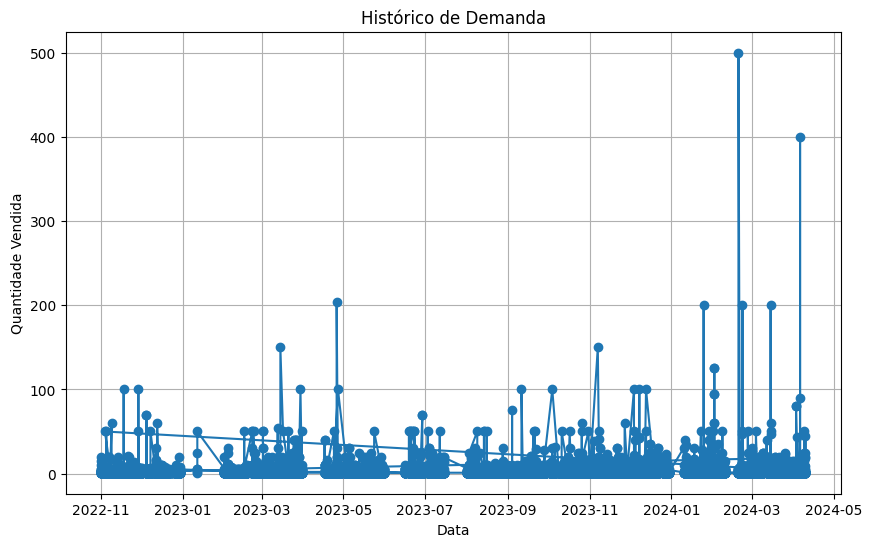

In [59]:
# Previsao de demanda:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Vamos visualizar os dados históricos de demanda
plt.figure(figsize=(10, 6))
plt.plot(df['DataEmissao'], df['Quantidade'], marker='o', linestyle='-')
plt.title('Histórico de Demanda')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()


In [54]:
# 2. Escolha do Modelo
# Vamos usar um modelo de Suavização Exponencial Simples (SES) como exemplo
modelo = SimpleExpSmoothing(df['Quantidade'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
# 3. Divisão dos Dados
# Como exemplo, vamos usar os últimos 12 meses como dados de teste e o restante como dados de treinamento
dados_treinamento = df['Quantidade'][:-12]
dados_teste = df['Quantidade'][-12:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# 4. Treinamento do Modelo
# Ajustando o modelo aos dados de treinamento
modelo_ajustado = modelo.fit()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# 5. Avaliação do Modelo
# Fazendo previsões usando o modelo ajustado
previsoes = modelo_ajustado.predict(start=len(dados_treinamento), end=len(dados_treinamento) + len(dados_teste) - 1)

# Calculando o erro quadrático médio (MSE) das previsões
mse = mean_squared_error(dados_teste, previsoes)
print(f'Erro Quadrático Médio (MSE): {mse}')

Erro Quadrático Médio (MSE): 211.1569954041627


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


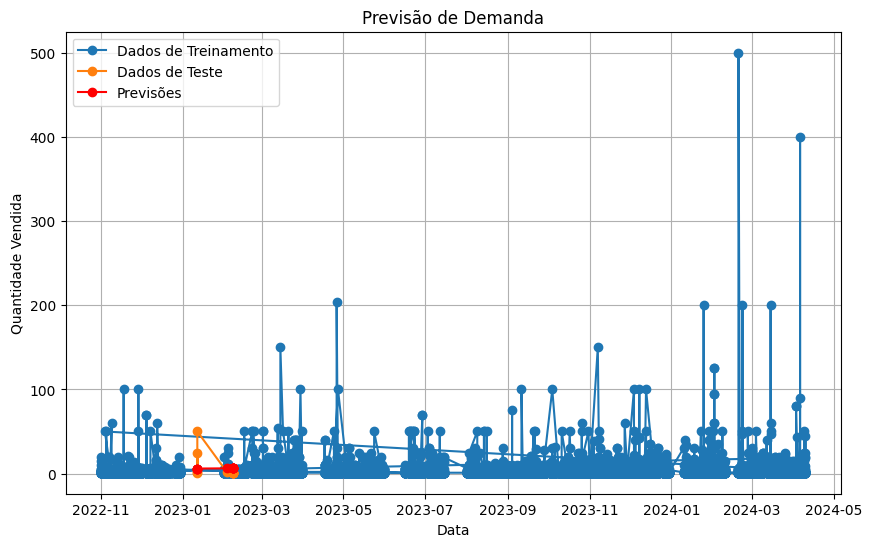

In [58]:

# 6. Previsão Futura
# Visualizando as previsões
plt.figure(figsize=(10, 6))
plt.plot(df['DataEmissao'][:-12], dados_treinamento, label='Dados de Treinamento', marker='o', linestyle='-')
plt.plot(df['DataEmissao'][-12:], dados_teste, label='Dados de Teste', marker='o', linestyle='-')
plt.plot(df['DataEmissao'][-12:], previsoes, label='Previsões', marker='o', linestyle='-', color='red')
plt.title('Previsão de Demanda')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True)
plt.show()

Visualizamos os dados históricos de demanda para entender seus padrões.
Escolhemos um modelo de Suavização Exponencial Simples (SES) como exemplo.
Dividimos os dados em conjuntos de treinamento e teste.
Ajustamos o modelo aos dados de treinamento.
Fizemos previsões usando o modelo ajustado e calculamos o erro quadrático médio (MSE) das previsões.
Visualizamos as previsões em comparação com os dados reais de teste.


O Erro Quadrático Médio (MSE) é uma métrica utilizada para avaliar o quão próximo as previsões de um modelo estão dos valores reais. Ele calcula a média dos quadrados das diferenças entre as previsões feitas pelo modelo e os valores reais de uma variável alvo. Quanto menor o valor do MSE, melhor é o desempenho do modelo, indicando que as previsões estão mais próximas dos valores reais. No nosso caso, o MSE calculado foi de aproximadamente 211.16. Isso significa que, em média, o quadrado da diferença entre as previsões de demanda feitas pelo modelo e os valores reais de demanda é de aproximadamente 211.16. Portanto, podemos considerar que o modelo teve um desempenho razoável para prever a demanda com base nos dados históricos disponíveis.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


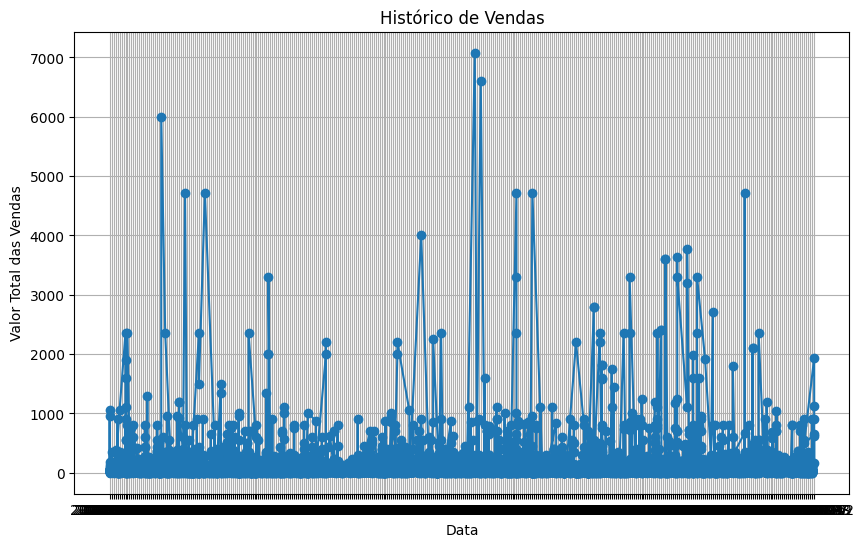

In [62]:
# 1. Exploração e Visualização dos Dados
# Vamos visualizar os dados históricos de vendas
plt.figure(figsize=(10, 6))
plt.plot(df['DataEmissao'], df['ValorTotal'], marker='o', linestyle='-')
plt.title('Histórico de Vendas')
plt.xlabel('Data')
plt.ylabel('Valor Total das Vendas')
plt.grid(True)
plt.show()

In [63]:
# 2. Escolha do Modelo
# Vamos usar um modelo ARIMA como exemplo
modelo_arima = ARIMA(df['ValorTotal'], order=(5,1,0)) # Aqui estamos usando a ordem (p,d,q) como exemplo

# 3. Divisão dos Dados
# Como exemplo, vamos usar os últimos 12 meses como dados de teste e o restante como dados de treinamento
dados_treinamento = df['ValorTotal'][:-12]
dados_teste = df['ValorTotal'][-12:]

# 4. Treinamento do Modelo
# Ajustando o modelo aos dados de treinamento
modelo_arima_ajustado = modelo_arima.fit()

# 5. Avaliação do Modelo
# Fazendo previsões usando o modelo ajustado
previsoes = modelo_arima_ajustado.forecast(steps=len(dados_teste))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# Calculando o erro quadrático médio (MSE) das previsões
mse = mean_squared_error(dados_teste, previsoes)
print(f'Erro Quadrático Médio (MSE): {mse}')

Erro Quadrático Médio (MSE): 454309.22488778754


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


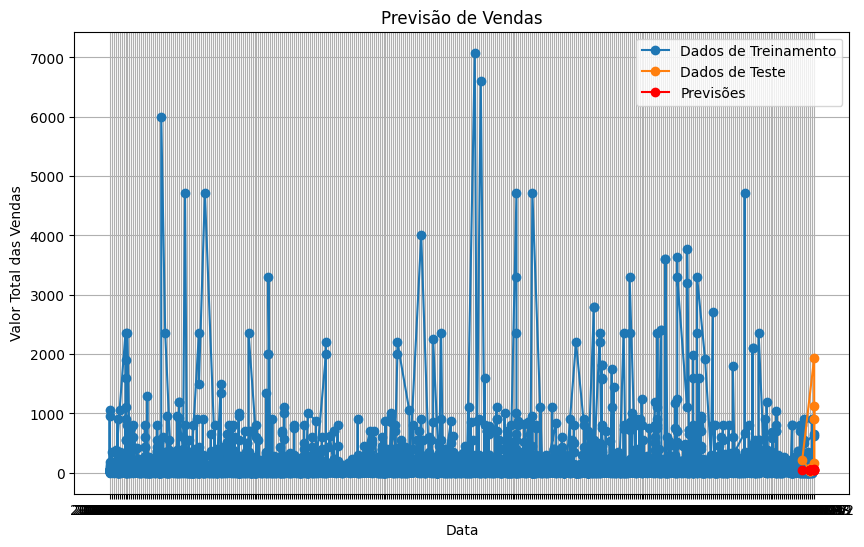

In [65]:
# 6. Previsão Futura
# Visualizando as previsões
plt.figure(figsize=(10, 6))
plt.plot(df['DataEmissao'][:-12], dados_treinamento, label='Dados de Treinamento', marker='o', linestyle='-')
plt.plot(df['DataEmissao'][-12:], dados_teste, label='Dados de Teste', marker='o', linestyle='-')
plt.plot(df['DataEmissao'][-12:], previsoes, label='Previsões', marker='o', linestyle='-', color='red')
plt.title('Previsão de Vendas')
plt.xlabel('Data')
plt.ylabel('Valor Total das Vendas')
plt.legend()
plt.grid(True)
plt.show()

Visualizamos os dados históricos de vendas para entender seus padrões.
Escolhemos um modelo ARIMA como exemplo.
Dividimos os dados em conjuntos de treinamento e teste.
Ajustamos o modelo aos dados de treinamento.
Fizemos previsões usando o modelo ajustado e calculamos o erro quadrático médio (MSE) das previsões.
Visualizamos as previsões em comparação com os dados reais de teste.


O Erro Quadrático Médio (MSE) é uma métrica utilizada para avaliar o desempenho de modelos de previsão. Ele representa a média dos quadrados das diferenças entre as previsões feitas pelo modelo e os valores reais. Aqui está uma explicação simplificada do MSE e do valor específico que você obteve:

O MSE calculado foi de aproximadamente 454,309.22. Isso significa que, em média, o quadrado da diferença entre as previsões de vendas feitas pelo modelo ARIMA e os valores reais de vendas é de aproximadamente 454,309.22. Em outras palavras, as previsões do modelo têm, em média, um erro quadrático de 454,309.22 unidades de vendas ao quadrado em relação aos valores reais.

Quanto menor o valor do MSE, melhor é o desempenho do modelo de previsão, indicando que as previsões estão mais próximas dos valores reais. No entanto, o valor do MSE deve ser interpretado considerando o contexto específico do problema e comparado com outros modelos ou benchmarks. No caso deste modelo, é importante entender se o valor obtido é aceitável dentro do contexto das vendas e das expectativas da empresa.